In [1]:
from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score


# Initialize the result dictionary
results = {'case_study': [], 'dataset': [], 'ari': []}

for path in glob('data/*/*.csv'):
    # Read in the data
    df = pd.read_csv(path)

    # Extract case study name and dataset name
    case_study = path.split('/')[1]
    dataset = path.split('/')[-1].split('.')[0]

    # Extract features and labels
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    # Perform clustering using KMeans
    kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
    y_pred = kmeans.fit_predict(X)

    # Evaluate the clustering results using Adjusted Rand Index (ARI)
    ari = adjusted_rand_score(y, y_pred)
    

    # Append the results to dictionary
    results['case_study'].append(case_study)
    results['dataset'].append(dataset)
    results['ari'].append(ari)


# Convert the dictionary to a dataframe
df_results = pd.DataFrame(results)
# Sort the dataframe by case study and dataset
df_results.sort_values(by=['case_study', 'dataset'], inplace=True)
# Reset the index
df_results.reset_index(drop=True, inplace=True)

In [2]:
df_results

,case_study,dataset,ari
0,eshopper,000,0.190788
1,eshopper,001,0.365002
2,eshopper,002,0.365944
3,eshopper,003,0.949623
4,eshopper,004,0.365325
...,...,...,...
555,trainticket,275,0.634714
556,trainticket,276,0.590767
557,trainticket,277,0.590644
558,trainticket,278,0.610953


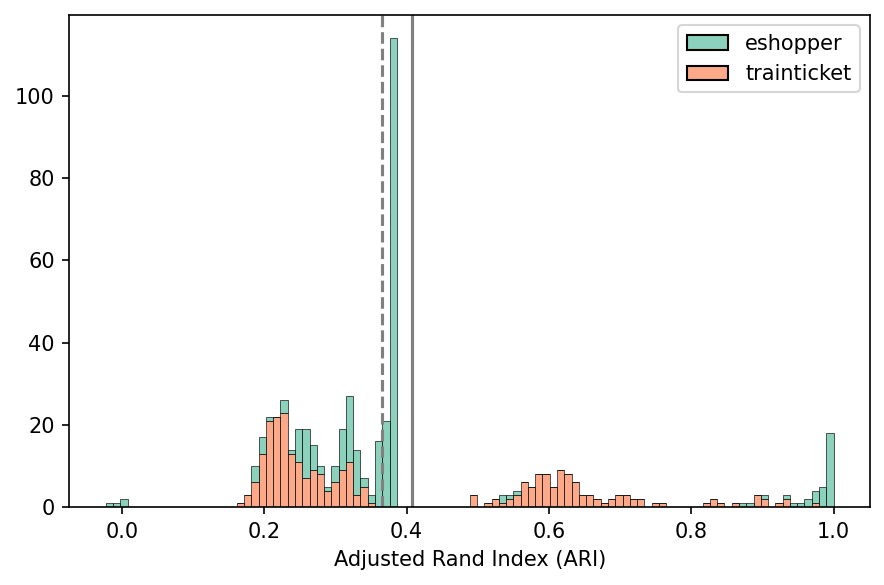

In [3]:
# Adjust dpi resolution and figure size
plt.rcParams['figure.dpi'] = 150

fig, ax = plt.subplots(figsize=(6, 4))

# Plot ARI distribution for each case study
sns.histplot(data=df_results, x='ari', hue='case_study', multiple='stack', bins=100,
            palette='Set2', ax=ax)


# Plot mean and median ARI
ax.axvline(x=df_results.ari.mean(), color='grey', linestyle='-')
ax.axvline(x=df_results.ari.median(), color='grey', linestyle='--')

ax.get_legend().set_title('')

# Display the plot
ax.set_xlabel('Adjusted Rand Index (ARI)')
ax.set_ylabel('')

plt.tight_layout()
plt.show()
